Most at times, it is usually challenging for young adults who are starting out their careers or who are getting into the phase of being independent. Knowing that many of them go to bigger cities to make ends meet or search for greener pastures, accommodation is usually a major factor of concern, which at times limits one's preference.

#### The goal of this project is to effectively explore this data, to figure how much young adults (18 - 29 years) spend on accommodation, in comparison to their incomes.

### Import Necessary Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Exploratory Data Analysis 

In [2]:
data = pd.read_csv('Accommodation Assessment Form.csv')

In [3]:
data.head()

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,2021/01/20 7:57:57 AM GMT+1,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,Yes
1,2021/01/20 9:02:40 AM GMT+1,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000,Yes
2,2021/01/20 9:07:23 AM GMT+1,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,R3500,Yes
3,2021/01/20 9:27:25 AM GMT+1,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,NaN,Yes
4,2021/01/20 9:27:53 AM GMT+1,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,N/A,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
Timestamp                                                                                            121 non-null object
Age                                                                                                  121 non-null int64
Gender                                                                                               121 non-null object
Maximum Level of Education                                                                           121 non-null object
Country                                                                                              121 non-null object
State/Province                                                                                       121 non-null object
Based on your answer above, how industrious is your State of residence?                              118 non-null object
Currency                                         

In [5]:
data.dtypes

Timestamp                                                                                             object
Age                                                                                                    int64
Gender                                                                                                object
Maximum Level of Education                                                                            object
Country                                                                                               object
State/Province                                                                                        object
Based on your answer above, how industrious is your State of residence?                               object
Currency                                                                                              object
Monthly Salary in the currency you mentioned above                                                     int64
Career Industry    

### Data Cleaning 

The 'Timestamp' feature is the time each responder filled in the form. Therefore, it doesn't add any information to the data and the goal of the project. Hereby, I shall drop it 

In [6]:
data.drop('Timestamp', axis = 1, inplace = True)

In [7]:
data.Age.value_counts()

22    23
23    19
25    14
24    12
21    12
29     9
20     9
27     7
19     7
28     6
26     2
18     1
Name: Age, dtype: int64

In [8]:
data.Gender.value_counts()

Female    78
Male      43
Name: Gender, dtype: int64

In [9]:
data['Maximum Level of Education'].value_counts()

Bachelor's Degree/Equivalent    100
High/Secondary School            13
Master's Degree                   6
Undergraduate                     2
Name: Maximum Level of Education, dtype: int64

In [10]:
data.Country.value_counts()

Nigeria         83
Nigeria         14
NIGERIA         13
NIGERIA          4
Kenya            3
South Africa     1
Nigerian         1
Adamawa          1
NIGERIAN         1
Name: Country, dtype: int64

In [11]:
data['Country'] = np.where(data['Country'] == 'Nigerian', 'Nigeria', data['Country'])
data['Country'] = np.where(data['Country'] == 'NIGERIAN', 'Nigeria', data['Country'])
data['Country'] = np.where(data['Country'] == 'NIGERIA', 'Nigeria', data['Country'])
data['Country'] = np.where(data['Country'] == 'Adamawa', 'Nigeria', data['Country'])

In [12]:
data['Country'].value_counts()

Nigeria         99
Nigeria         14
NIGERIA          4
Kenya            3
South Africa     1
Name: Country, dtype: int64

In [13]:
data['Country'] = np.where(data['Country'] == 'NIGERIA ', 'Nigeria', data['Country'])
data['Country'] = np.where(data['Country'] == 'Nigeria ', 'Nigeria', data['Country'])

In [14]:
data['Country'].value_counts()

Nigeria         117
Kenya             3
South Africa      1
Name: Country, dtype: int64

In [15]:
data['State/Province'].value_counts()

Lagos                               36
Lagos                                5
Rivers State                         5
Oyo                                  4
LAGOS                                4
Kwara                                3
Ekiti                                3
Nairobi                              3
Ondo                                 3
Lagos State                          3
Ogun State                           3
Cross River                          2
FCT Abuja                            2
OYO                                  2
Abuja                                2
Enugu                                2
Ogun                                 2
LAGOS STATE                          1
Lagos, Lagos                         1
Rivers                               1
BORNO                                1
Abia State                           1
Delta                                1
lagos                                1
F.C.T. - Abuja                       1
Anambra                  

In [16]:
data['State/Province'] = np.where(data['State/Province'] == 'LAGOS STATE', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos State/ Ikorodu', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Nigeria', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'STATE', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos and Osun', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos ', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos, Lagos', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos State', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos ', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'LAGOS', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Oyo', 'Oyo State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'OYO', 'Oyo State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'lagos', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'ONDO', 'Ondo State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'OGUN STATE', 'Ogun State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'BORNO', 'Borno State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'EKITI', 'Ekiti State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Ekiti', 'Ekiti State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Ogun', 'Ogun State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Abuja', 'F.C.T. - Abuja', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Federal Capital Territory', 'F.C.T. - Abuja', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Rivers', 'Rivers State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Osun', 'Osun State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Delta', 'Delta State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Lagos', 'Lagos State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'FCT Abuja', 'F.C.T. - Abuja', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Rivers', 'Rivers State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Ekiti state', 'Ekiti State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'BORNO ', 'Borno State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Ondo', 'Ondo State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'OSUN', 'Osun State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'ANAMBRA STATE, NIGERIA', 'Anambra State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'ANAMBRA STATE, NIGERIA', 'Anambra State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'ogun', 'Ogun State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Kano', 'Kano State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Akwa Ibom', 'Akwa Ibom State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Ilorin, Kwara state', 'Kwara State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'FCT', 'F.C.T. - Abuja', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'FEDERAL CAPITAL TERRITORY.', 'F.C.T. - Abuja', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Kano', 'Kano State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Abia state', 'Abia State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'FEDERAL CAPITAL TERRITORY, ABUJA', 'F.C.T. - Abuja', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Kwara', 'Kwara State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Anambra', 'Anambra State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'ENUGU', 'Enugu State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Enugu', 'Enugu State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Oyo state', 'Oyo State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Cross river', 'Cross River', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'Abia state ', 'Abia State', data['State/Province'])
data['State/Province'] = np.where(data['State/Province'] == 'STATE ', 'Lagos State', data['State/Province'])

In [17]:
data['State/Province'].value_counts()

Lagos State        55
F.C.T. - Abuja      9
Oyo State           8
Ogun State          7
Rivers State        6
Ekiti State         5
Kwara State         4
Ondo State          4
Cross River         3
Enugu State         3
Nairobi             3
Osun State          3
Abia State          2
Delta State         2
Anambra State       2
Niger state         1
Kano State          1
Borno State         1
Akwa Ibom State     1
Cape Town           1
Name: State/Province, dtype: int64

In [18]:
data['Based on your answer above, how industrious is your State of residence?'].value_counts()

Industrious                        59
Most industrious in the country    36
Non-Industrious                    17
Unknown                             6
Name: Based on your answer above, how industrious is your State of residence?, dtype: int64

In [19]:
data['Currency'].value_counts()

Naira               96
NAIRA               11
Naira                6
Kenyan Shillings     3
Dollars              1
Naira, Dollars       1
NAIRA                1
Rand                 1
NARIA                1
Name: Currency, dtype: int64

In [20]:
data['Currency'] = np.where(data['Currency'] == 'NAIRA', 'Naira', data['Currency'])
data['Currency'] = np.where(data['Currency'] == 'Naira ', 'Naira', data['Currency'])
data['Currency'] = np.where(data['Currency'] == 'NAIRA ', 'Naira', data['Currency'])
data['Currency'] = np.where(data['Currency'] == 'NARIA', 'Naira', data['Currency'])
data['Currency'] = np.where(data['Currency'] == 'Naira, Dollars', 'Naira', data['Currency'])

In [21]:
data['Currency'].value_counts()

Naira               116
Kenyan Shillings      3
Dollars               1
Rand                  1
Name: Currency, dtype: int64

In [22]:
data['Monthly Salary in the currency you mentioned above'].value_counts()

0         47
50000      8
20000      7
150000     5
40000      5
80000      4
30000      4
200000     4
100000     3
33000      2
10000      2
15000      2
70000      2
500000     2
75000      2
60000      2
18000      1
90000      1
5000       1
450000     1
17000      1
145000     1
170000     1
4000       1
100        1
64000      1
47000      1
300000     1
800000     1
25000      1
143000     1
103000     1
2000       1
190000     1
62000      1
140000     1
Name: Monthly Salary in the currency you mentioned above, dtype: int64

In [23]:
data['Career Industry'].value_counts()

Tech                                    49
Tech                                     5
Student                                  4
Education                                3
Media                                    3
Hospitality                              3
Education                                2
Health                                   2
Engineering                              2
Teaching                                 2
Law                                      2
Engineering                              2
Tailoring                                1
Accounting                               1
Crafts                                   1
Architecture                             1
Insurance                                1
FinTech                                  1
Education/Teaching                       1
Management                               1
Geoscience                               1
Utility                                  1
TECH                                     1
Software En

In [24]:
data['Career Industry'] = np.where(data['Career Industry'] == 'Tech ', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Education ', 'Education', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Teaching', 'Education', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == '0', 'Student', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'nil', 'Student', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'TECH', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Banking', 'Finance', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'UI Design', 'Design', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Tech, science. ', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'INFORMATION TECHNOLOGY', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Tailoring', 'Fashion designing', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Graphics and printing ', 'Design', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'IT', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'I.T', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Education/Teaching', 'Education', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Clothing', 'Fashion designing', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Technology', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Software Engineer', 'Tech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Music ', 'Media', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Hospitality', 'Health', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Crafts', 'Media', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Advertising, Research', 'Research', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Engineering ', 'Engineering', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Aviation', 'Engineering', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Data Science, Architecture, Research', 'Research', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'AUDIT FIRM', 'Consulting', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Accounting', 'Finance', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Accounting ', 'Finance', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Science.', 'Education', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'AGRICULTURE', 'Agriculture', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Development', 'Management', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Accounting & Tech', 'FinTech', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Management ', 'Management', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Health ', 'Health', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Mechanic', 'Engineering', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Utility', 'Management', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Finance ', 'Finance', data['Career Industry'])
data['Career Industry'] = np.where(data['Career Industry'] == 'Fashion designing ', 'Fashion designing', data['Career Industry'])

In [25]:
data['Career Industry'].value_counts()

Tech                 61
Education             9
Engineering           6
Student               6
Health                6
Media                 5
Finance               5
Fashion designing     3
Management            3
Design                2
Agriculture           2
Law                   2
FinTech               2
Research              2
Real Estate           1
Geoscience            1
Consulting            1
Architecture          1
Construction          1
AUDIT FIRM            1
Insurance             1
Name: Career Industry, dtype: int64

In [26]:
data['Years of working experience'].value_counts()

0.00     39
1.00     31
2.00     23
3.00      9
4.00      4
5.00      2
6.00      2
8.00      2
2.50      1
0.20      1
1.50      1
0.50      1
0.25      1
7.00      1
10.00     1
0.30      1
0.40      1
Name: Years of working experience, dtype: int64

In [27]:
data['Do you foot your accommodation bills?'].value_counts()

No                62
Yes               39
Not completely    20
Name: Do you foot your accommodation bills?, dtype: int64

In [28]:
data['If you selected "Not completely", what fraction of the rent do you pay?'].value_counts()

1/2                              8
1/3                              8
1/4                              7
0                                2
I don't pay                      1
2/3                              1
I do pay for my accommodation    1
Name: If you selected "Not completely", what fraction of the rent do you pay?, dtype: int64

In [29]:
data['If you selected "Not completely", what fraction of the rent do you pay?'] = np.where(data['If you selected "Not completely", what fraction of the rent do you pay?'] == 'I do pay for my accommodation', 0, data['If you selected "Not completely", what fraction of the rent do you pay?'])
data['If you selected "Not completely", what fraction of the rent do you pay?'] = np.where(data['If you selected "Not completely", what fraction of the rent do you pay?'] == "I don't pay", 0, data['If you selected "Not completely", what fraction of the rent do you pay?'])

In [30]:
data['If you selected "Not completely", what fraction of the rent do you pay?'].value_counts()

1/2    8
1/3    8
1/4    7
0      2
0      2
2/3    1
Name: If you selected "Not completely", what fraction of the rent do you pay?, dtype: int64

In [31]:
data['Accommodation Rented'].value_counts()

Self-contained                   41
Neither. I do not pay rents      37
Mini Flat                        13
Shared Flat                      10
Full Flat                         8
Studio apartment                  5
Shared Duplex                     2
Single room                       1
I do not have an accomodation     1
Hostel                            1
Shared hostel space               1
1 room face me I face you         1
Name: Accommodation Rented, dtype: int64

In [32]:
data['Accommodation Rented'] = np.where(data['Accommodation Rented'] == '1 room face me I face you ', 'Self-contained', data['Accommodation Rented'])
data['Accommodation Rented'] = np.where(data['Accommodation Rented'] == 'Single room', 'Self-contained', data['Accommodation Rented'])
data['Accommodation Rented'] = np.where(data['Accommodation Rented'] == 'Shared hostel space', 'Hostel', data['Accommodation Rented'])

In [33]:
data['Accommodation Rented'].value_counts()

Self-contained                   43
Neither. I do not pay rents      37
Mini Flat                        13
Shared Flat                      10
Full Flat                         8
Studio apartment                  5
Hostel                            2
Shared Duplex                     2
I do not have an accomodation     1
Name: Accommodation Rented, dtype: int64

In [34]:
data['Location of accommodation'].value_counts()

Mid-class area        68
I do not pay rents    29
Low brow area         17
High brow area         7
Name: Location of accommodation, dtype: int64

In [35]:
data['Do you think accommodation prices are generally high in your State of residence for young adults?'].value_counts()

Yes            100
No              14
Indifferent      7
Name: Do you think accommodation prices are generally high in your State of residence for young adults?, dtype: int64

In [36]:
data.isnull().sum()

Age                                                                                                   0
Gender                                                                                                0
Maximum Level of Education                                                                            0
Country                                                                                               0
State/Province                                                                                        0
Based on your answer above, how industrious is your State of residence?                               3
Currency                                                                                              0
Monthly Salary in the currency you mentioned above                                                    0
Career Industry                                                                                       0
Years of working experience                                     

In [37]:
data.drop('If you selected "Not completely", what fraction of the rent do you pay?', inplace = True, axis = 1)

In [38]:
data.fillna(method = 'ffill', inplace = True)

In [39]:
data.isnull().sum()

Age                                                                                                  0
Gender                                                                                               0
Maximum Level of Education                                                                           0
Country                                                                                              0
State/Province                                                                                       0
Based on your answer above, how industrious is your State of residence?                              0
Currency                                                                                             0
Monthly Salary in the currency you mentioned above                                                   0
Career Industry                                                                                      0
Years of working experience                                              

In [40]:
data.rename(columns = {'Do you think accommodation prices are generally high in your State of residence for young adults?': 'Pricey or not'}, inplace = True)

### Data Visualization 

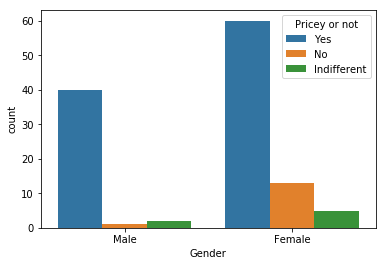

In [41]:
sns.countplot(x = 'Gender', data = data, hue = 'Pricey or not')

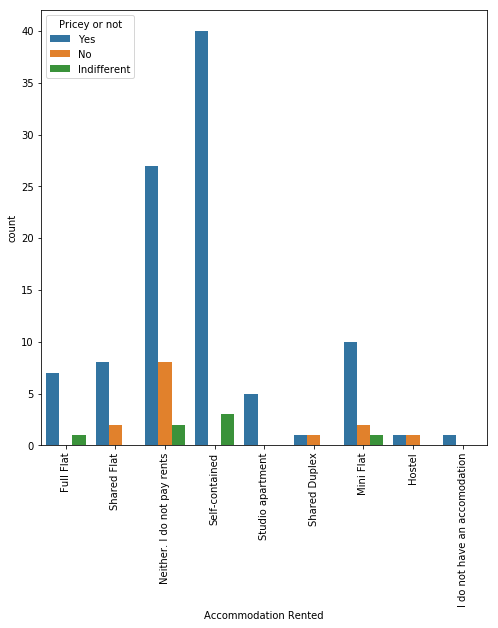

In [42]:
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.countplot(x = 'Accommodation Rented', data = data, hue = 'Pricey or not')

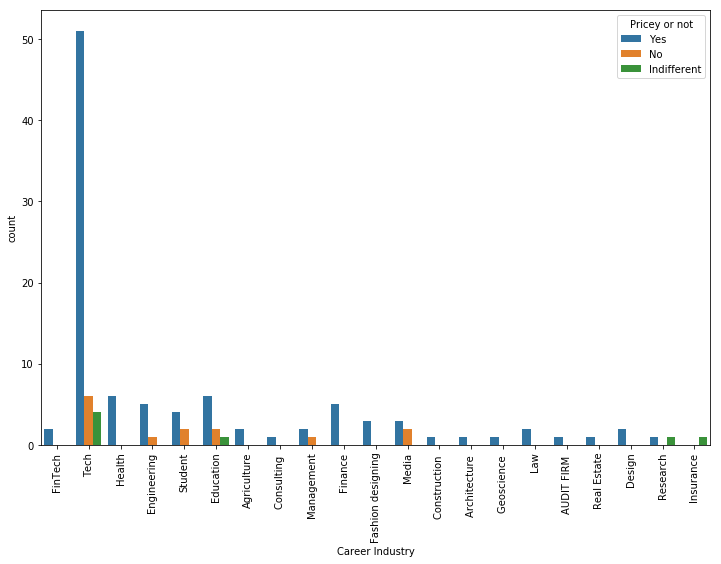

In [43]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
sns.countplot(x = 'Career Industry', data = data, hue = 'Pricey or not')

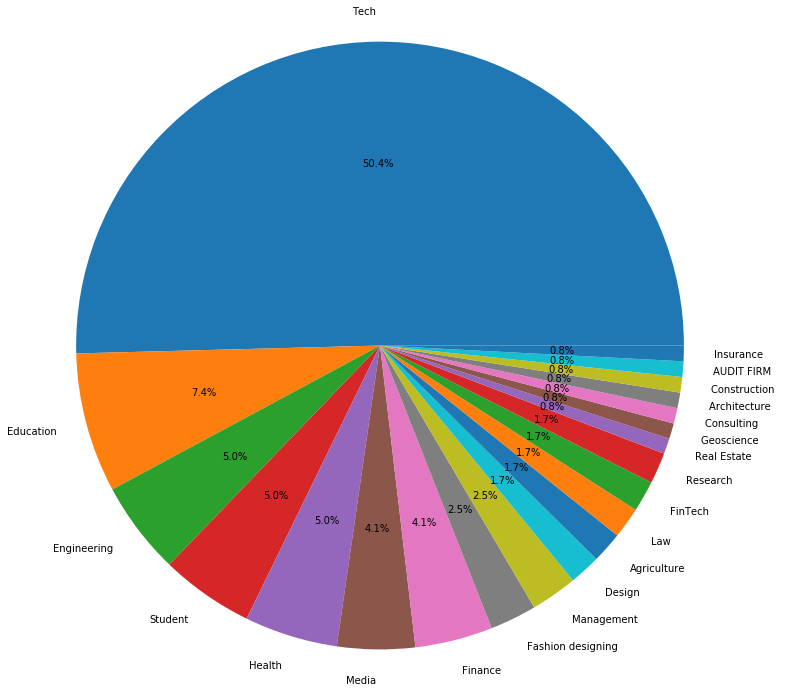

In [44]:
plt.figure(figsize=(12,12))
labels = data['Career Industry'].value_counts().index
feature = data['Career Industry'].value_counts()

plt.pie(feature, labels = labels, autopct='%1.1f%%', shadow=False)

plt.axis('equal')
plt.show()

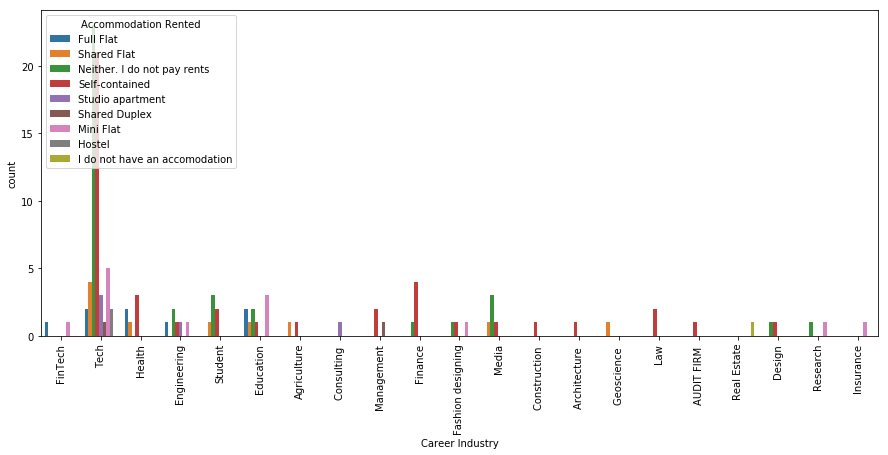

In [45]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'Career Industry', data = data, hue = 'Accommodation Rented')


In [47]:
data['Monthly Salary in the currency you mentioned above'].sort_values()

60          0
72          0
71          0
70          0
62          0
61          0
59          0
73          0
55          0
47          0
46          0
45          0
44          0
43          0
42          0
49          0
74          0
78          0
80          0
108         0
107         0
105         0
104         0
103         0
99          0
98          0
93          0
92          0
91          0
89          0
        ...  
25      75000
116     75000
39      80000
16      80000
115     80000
23      80000
86      90000
57     100000
110    100000
65     100000
90     103000
20     140000
113    143000
9      145000
114    150000
1      150000
0      150000
75     150000
21     150000
67     170000
30     190000
54     200000
33     200000
11     200000
37     200000
76     300000
19     450000
15     500000
64     500000
68     800000
Name: Monthly Salary in the currency you mentioned above, Length: 121, dtype: int64

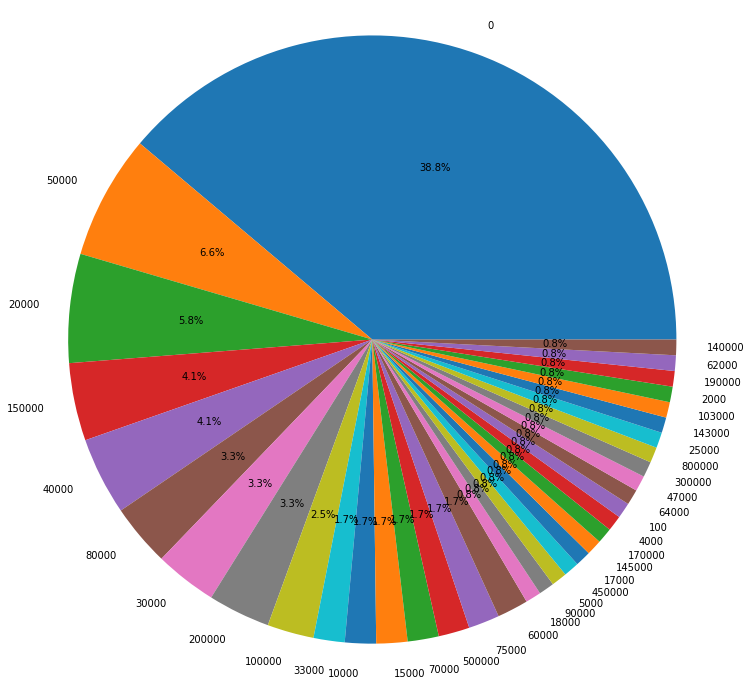

In [48]:
plt.figure(figsize=(12,12))
labels = data['Monthly Salary in the currency you mentioned above'].value_counts().index
feature = data['Monthly Salary in the currency you mentioned above'].value_counts()

plt.pie(feature, labels = labels, autopct='%1.1f%%', shadow=False)

plt.axis('equal')
plt.show()

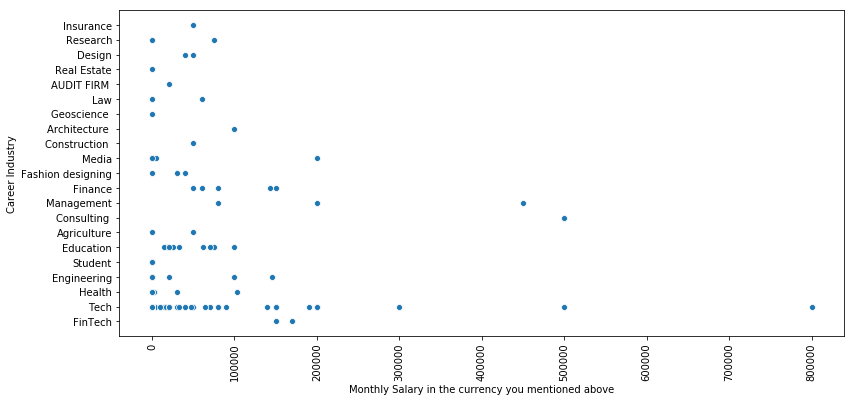

In [58]:
plt.figure(figsize=(13,6))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'Monthly Salary in the currency you mentioned above', y = 'Career Industry', data = data)

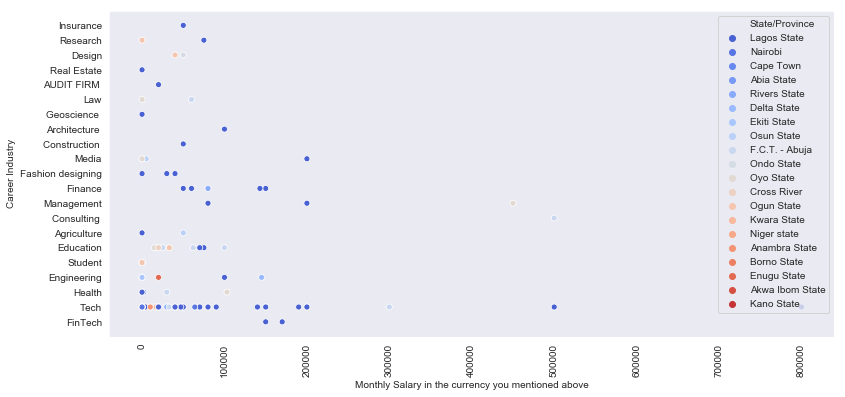

In [66]:
plt.figure(figsize=(13,6))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'Monthly Salary in the currency you mentioned above', y = 'Career Industry', data = data, hue = 'State/Province',
               palette='coolwarm')
sns.set_style(style = 'dark')

### Model Summary 

From the Above visualization, we can see most of the individuals are in the tech industry. These individuals have a great influence on this analysis as they take up to 50% of the sample data. 

Also to be noted, most of the respondents of this survey are Nigerians. 

### Drawn Conclusion

By Gender, both widely known genders generally think the accommodation prices are on the high side but more females think some prices are acceptable.

Another determining factor is the type of house chosen. Basically all kinds of housing is pricey according to this data.

Although, there are some exceptions to those living with others - shared duplex and hostel. There's no obvious stance to the weight of house price. 

According to the industry, as stated before, most individuals that responded to the survey belong to the tech industry. And majority think it is expensive to live on their own. The count of the people in the other industries don't seem to be up to 10! but they too think it is expensive to live on their own. 

In industries such as Law, Finance, FinTech, Architecture, Geoscience, Real estate and consulting where one will think money is not a problem, young professionals in those fields are completely sure it is expensive to live on their own in Nigeria.  

Although the tech young professionals have the highest replies, their salaries range grately between 0-100,000 NGN. Also gathered, most of them don't pay their own rent. So it will be baised to say if a youth between the ages 18-29 chooses to work in the tech industry it will be expensive to live on his or her own because over 20 of them don't pay rents themselves. 


Basically, every young professional earn within 0-200,000 NGN and still think it is expensive to pay accommodation themselves. One can postulate it's the region of the world they reside in. 